In [3]:
# loader le fichier csv
import pandas as pd 

df = pd.read_csv('../../data/les-arbres.csv', sep = ';', error_bad_lines = False)


df.shape

b'Skipping line 1916: expected 17 fields, saw 18\n'


(200332, 17)

In [4]:
df.head()

,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,232702.0,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,BOULEVARD DE MENILMONTANT,000602002,Sophora,Sophora,japonica,NaN,55.0,5.0,JA,0.0,"48.8652353853, 2.38481800435"
1,235862.0,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,AVENUE DE LA PORTE DE CLIGNANCOURT,000303007,Tilleul,Tilia,tomentosa,NaN,60.0,10.0,JA,NaN,"48.8999949231, 2.34379810146"
2,236391.0,Arbre,Alignement,PARIS 15E ARRDT,27,NaN,BOULEVARD GARIBALDI,000101024,Noisetier de Byzance,Corylus,colurna,NaN,60.0,10.0,JA,NaN,"48.8470727044, 2.30470921442"
3,241122.0,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE SARRETTE,000501003,Tilleul,Tilia,tomentosa,NaN,155.0,12.0,A,0.0,"48.8259993388, 2.32878574525"
4,99927.0,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DU RANELAGH,00030007,Erable,Acer,platanoides,'Schwedleri',125.0,0.0,NaN,NaN,"48.858836461, 2.26870442691"


In [5]:
# les stats sur les variable numeriques

df.describe()

,IDBASE,NUMERO,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE
count,2.003320e+05,0.0,200332.000000,200332.000000,137203.000000
mean,3.871040e+05,NaN,83.377988,13.108235,0.001341
std,5.454652e+05,NaN,672.864029,1970.258098,0.036596
min,9.987400e+04,NaN,0.000000,0.000000,0.000000
25%,1.558788e+05,NaN,30.000000,5.000000,0.000000
50%,2.210865e+05,NaN,70.000000,8.000000,0.000000
75%,2.741462e+05,NaN,115.000000,12.000000,0.000000
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000


In [8]:
# enlever la colonne NUMERO

df.drop(columns = ['NUMERO'], inplace=True)




Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLEFRANCAIS', 'GENRE', 'ESPECE', 'VARIETEOUCULTIVAR',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'REMARQUABLE',
       'geo_point_2d'],
      dtype='object')

In [9]:
'NUMERO' in df.columns

False

In [16]:
for col in df.columns:
    if df[col].dtype == 'O':
        print("--" * 20)
        print("  {}".format(col))
        print(df[col].value_counts( dropna= False )[:3] )
    

----------------------------------------
  TYPEEMPLACEMENT
Arbre    200332
Name: TYPEEMPLACEMENT, dtype: int64
----------------------------------------
  DOMANIALITE
Alignement    105061
Jardin         46329
CIMETIERE      31933
Name: DOMANIALITE, dtype: int64
----------------------------------------
  ARRONDISSEMENT
PARIS 15E ARRDT    17156
PARIS 13E ARRDT    16714
PARIS 16E ARRDT    16405
Name: ARRONDISSEMENT, dtype: int64
----------------------------------------
  COMPLEMENTADRESSE
NaN    169318
SN°       557
1         552
Name: COMPLEMENTADRESSE, dtype: int64
----------------------------------------
  LIEU / ADRESSE
PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE    2995
PARC DES BUTTES CHAUMONT                       2331
PARC ANDRE CITROEN                             2095
Name: LIEU / ADRESSE, dtype: int64
----------------------------------------
  IDEMPLACEMENT
000101001    1290
000101002    1210
000101003    1098
Name: IDEMPLACEMENT, dtype: int64
------------------------------------

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

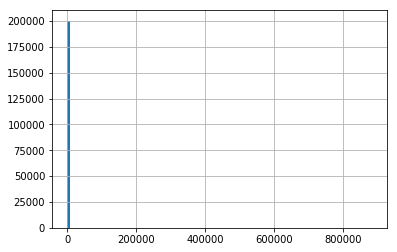

In [23]:
fig, ax = plt.subplots(1,1)
df['HAUTEUR (m)'].hist(bins = 100)
plt.show()

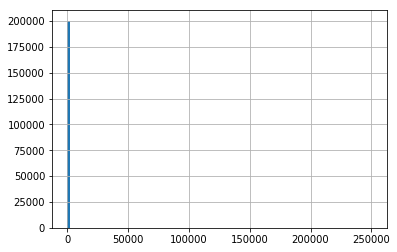

In [27]:
fig, ax = plt.subplots(1,1)
df['CIRCONFERENCEENCM'].hist(bins = 100)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x11246e240>],
 'caps': [<matplotlib.lines.Line2D at 0x1124d5cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x115c7a240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115c46b00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x112478e80>,
  <matplotlib.lines.Line2D at 0x1124ac940>]}

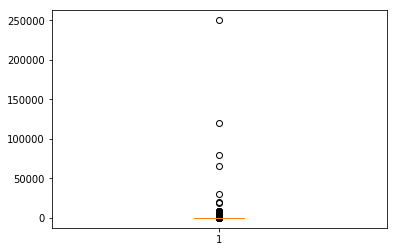

In [30]:

plt.boxplot(df['CIRCONFERENCEENCM'])

In [33]:
import numpy as np


df['diametre'] = df['CIRCONFERENCEENCM'].apply( lambda c : c /np.pi    )

df['diametre'] = df['CIRCONFERENCEENCM'] / np.pi

In [37]:
df.diametre.describe()

np.percentile(df.diametre, 99.9)

136.4518087697526

In [40]:
condition = (df['HAUTEUR (m)'] > 0 ) & (df['HAUTEUR (m)'] < 100 ) & (df['diametre'] < 150 )

df[condition].shape

df = df[condition]

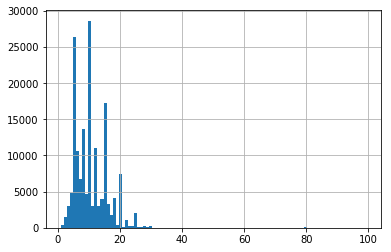

In [41]:
df['HAUTEUR (m)'].hist(bins = 100)

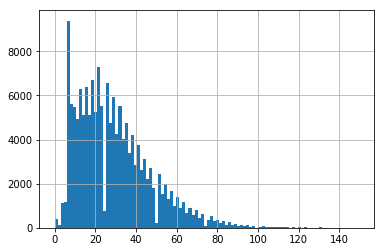

In [42]:
df['diametre'].hist(bins = 100)

In [43]:
df.ARRONDISSEMENT

0           PARIS 11E ARRDT
1           PARIS 18E ARRDT
2           PARIS 15E ARRDT
3           PARIS 14E ARRDT
5            PARIS 7E ARRDT
8            PARIS 4E ARRDT
11          PARIS 18E ARRDT
14        SEINE-SAINT-DENIS
16        SEINE-SAINT-DENIS
17          PARIS 15E ARRDT
18          PARIS 12E ARRDT
19          PARIS 12E ARRDT
20          PARIS 16E ARRDT
21          PARIS 17E ARRDT
22          PARIS 15E ARRDT
23          PARIS 16E ARRDT
24          PARIS 16E ARRDT
25          PARIS 16E ARRDT
26          PARIS 15E ARRDT
27          PARIS 11E ARRDT
28           PARIS 8E ARRDT
29          PARIS 18E ARRDT
30          PARIS 20E ARRDT
31          PARIS 12E ARRDT
32          PARIS 13E ARRDT
34          PARIS 15E ARRDT
35        BOIS DE VINCENNES
36        BOIS DE VINCENNES
37          PARIS 19E ARRDT
38        BOIS DE VINCENNES
                ...        
200300      PARIS 15E ARRDT
200301      PARIS 15E ARRDT
200302      PARIS 16E ARRDT
200303      PARIS 15E ARRDT
200304      PARIS 16

In [44]:
# les arbres dans paris
# ARRONDISSEMENT contient "PARIS"

condition = df.ARRONDISSEMENT.str.contains('PARIS')

df[condition].ARRONDISSEMENT.value_counts()




PARIS 16E ARRDT    15012
PARIS 13E ARRDT    13824
PARIS 20E ARRDT    12934
PARIS 12E ARRDT    12159
PARIS 15E ARRDT    11442
PARIS 14E ARRDT    11358
PARIS 19E ARRDT    10298
PARIS 17E ARRDT     8678
PARIS 7E ARRDT      8507
PARIS 18E ARRDT     8454
PARIS 8E ARRDT      7062
PARIS 11E ARRDT     5529
PARIS 10E ARRDT     3106
PARIS 4E ARRDT      2690
PARIS 5E ARRDT      2341
PARIS 6E ARRDT      1754
PARIS 1ER ARRDT     1335
PARIS 3E ARRDT      1200
PARIS 9E ARRDT      1098
PARIS 2E ARRDT       537
Name: ARRONDISSEMENT, dtype: int64

In [45]:
df = df[condition]
df.shape

(139318, 17)

In [61]:
gb = df.groupby( by = ['ARRONDISSEMENT', 'LIBELLEFRANCAIS']  ).mean()
gb.reset_index(inplace = True)
gb

,ARRONDISSEMENT,LIBELLEFRANCAIS,IDBASE,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE,diametre
0,PARIS 10E ARRDT,Ailante,3.216584e+05,103.741935,9.967742,0.000000,33.022084
1,PARIS 10E ARRDT,Alisier,2.930440e+05,20.000000,5.000000,0.000000,6.366198
2,PARIS 10E ARRDT,Amandier,1.842330e+05,25.000000,3.000000,0.000000,7.957747
3,PARIS 10E ARRDT,Arbre aux quarante écus,2.750314e+05,69.461538,9.307692,0.000000,22.110294
4,PARIS 10E ARRDT,Arbre de Judée,4.904134e+05,93.444444,7.000000,0.000000,29.744290
5,PARIS 10E ARRDT,Arbre à soie,1.871217e+05,18.666667,3.333333,0.000000,5.941785
6,PARIS 10E ARRDT,Bouleau,1.977930e+05,63.588235,11.509804,0.000000,20.240764
7,PARIS 10E ARRDT,Catalpa,2.301977e+05,80.000000,10.000000,0.000000,25.464791
8,PARIS 10E ARRDT,Cerisier à fleurs,7.036113e+05,53.000000,5.246154,0.000000,16.870424
9,PARIS 10E ARRDT,Cerisier à fruits,1.842370e+05,25.000000,4.000000,0.000000,7.957747


In [76]:
gb = df.groupby( by = 'ARRONDISSEMENT'  ).count()
gb.reset_index(inplace = True)
gb

,ARRONDISSEMENT,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,COMPLEMENTADRESSE,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d,diametre
0,PARIS 10E ARRDT,3106,3106,3106,1252,3106,3106,3079,3106,2786,1050,3106,3106,2770,2834,3106,3106
1,PARIS 11E ARRDT,5529,5529,5529,431,5529,5529,5514,5529,5504,601,5529,5529,4474,4625,5529,5529
2,PARIS 12E ARRDT,12159,12159,12159,1404,12159,12159,12033,12159,12023,2121,12159,12159,8741,8387,12159,12159
3,PARIS 13E ARRDT,13824,13824,13824,1302,13824,13824,13735,13824,13756,3005,13824,13824,10219,10328,13824,13824
4,PARIS 14E ARRDT,11358,11358,11358,702,11358,11358,11194,11358,11217,2203,11358,11358,10164,9964,11358,11358
5,PARIS 15E ARRDT,11442,11442,11442,7746,11442,11442,11281,11442,11398,3047,11442,11442,9710,9142,11442,11442
6,PARIS 16E ARRDT,15012,15012,15012,1595,15012,15012,14915,15012,14949,1652,15012,15012,11475,10545,15012,15012
7,PARIS 17E ARRDT,8678,8678,8678,941,8678,8678,8629,8678,8643,1479,8678,8678,7374,6926,8678,8678
8,PARIS 18E ARRDT,8454,8454,8454,1055,8454,8454,8372,8454,8388,2286,8454,8454,6914,6581,8454,8454
9,PARIS 19E ARRDT,10298,10298,10298,770,10298,10298,10201,10298,10230,1793,10298,10298,7391,8099,10298,10298


In [77]:
gb.rename(columns={'DOMANIALITE': 'nbre_abres'}, inplace = True)

gb = gb[['ARRONDISSEMENT', 'nbre_abres']]


In [78]:
gb

,ARRONDISSEMENT,nbre_abres
0,PARIS 10E ARRDT,3106
1,PARIS 11E ARRDT,5529
2,PARIS 12E ARRDT,12159
3,PARIS 13E ARRDT,13824
4,PARIS 14E ARRDT,11358
5,PARIS 15E ARRDT,11442
6,PARIS 16E ARRDT,15012
7,PARIS 17E ARRDT,8678
8,PARIS 18E ARRDT,8454
9,PARIS 19E ARRDT,10298


In [69]:
df['ARRONDISSEMENT'].value_counts()

PARIS 16E ARRDT    15012
PARIS 13E ARRDT    13824
PARIS 20E ARRDT    12934
PARIS 12E ARRDT    12159
PARIS 15E ARRDT    11442
PARIS 14E ARRDT    11358
PARIS 19E ARRDT    10298
PARIS 17E ARRDT     8678
PARIS 7E ARRDT      8507
PARIS 18E ARRDT     8454
PARIS 8E ARRDT      7062
PARIS 11E ARRDT     5529
PARIS 10E ARRDT     3106
PARIS 4E ARRDT      2690
PARIS 5E ARRDT      2341
PARIS 6E ARRDT      1754
PARIS 1ER ARRDT     1335
PARIS 3E ARRDT      1200
PARIS 9E ARRDT      1098
PARIS 2E ARRDT       537
Name: ARRONDISSEMENT, dtype: int64

In [79]:


def format_arrdt(texte):
    '''
    PARIS 3E ARRDT => 75103
    '''
    texte = '751' + texte.split(' ')[1].replace('E','').replace('R','').zfill(2) 
    return int(texte)
    

gb['code_postal']  = gb['ARRONDISSEMENT'].apply(lambda ardt : format_arrdt(ardt) )
gb    

/Users/alexis/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ARRONDISSEMENT,nbre_abres,code_postal
0,PARIS 10E ARRDT,3106,75110
1,PARIS 11E ARRDT,5529,75111
2,PARIS 12E ARRDT,12159,75112
3,PARIS 13E ARRDT,13824,75113
4,PARIS 14E ARRDT,11358,75114
5,PARIS 15E ARRDT,11442,75115
6,PARIS 16E ARRDT,15012,75116
7,PARIS 17E ARRDT,8678,75117
8,PARIS 18E ARRDT,8454,75118
9,PARIS 19E ARRDT,10298,75119


In [84]:
arrdt = pd.read_csv('../../data/arrondissements.csv', sep = ';')
arrdt.head()

,C_ARINSEE,L_AR,SURFACE,PERIMETRE,OBJECTID,LONGUEUR
0,75102,2ème Ardt,9.911537e+05,4554.104360,2,4553.938764
1,75103,3ème Ardt,1.170883e+06,4519.263648,3,4519.071982
2,75112,12ème Ardt,1.631478e+07,24089.666298,12,24088.038922
3,75101,1er Ardt,1.824613e+06,6054.936862,1,6054.680862
4,75104,4ème Ardt,1.600586e+06,5420.908434,4,5420.636779


In [85]:
arrdt.rename(columns = {'C_ARINSEE': 'code_postal'}, inplace = True)
arrdt.head()

,code_postal,L_AR,SURFACE,PERIMETRE,OBJECTID,LONGUEUR
0,75102,2ème Ardt,9.911537e+05,4554.104360,2,4553.938764
1,75103,3ème Ardt,1.170883e+06,4519.263648,3,4519.071982
2,75112,12ème Ardt,1.631478e+07,24089.666298,12,24088.038922
3,75101,1er Ardt,1.824613e+06,6054.936862,1,6054.680862
4,75104,4ème Ardt,1.600586e+06,5420.908434,4,5420.636779


In [ ]:
# join

gb = gb.merge(arrdt, on = 'code_postal')

gb

In [93]:
gb['ratio'] = gb['nbre_abres'] /  gb['SURFACE']

gb.sort_values(by = 'ratio' , ascending = False, inplace= True)

gb[['ARRONDISSEMENT', 'nbre_abres', 'SURFACE', 'ratio']]


,ARRONDISSEMENT,nbre_abres,SURFACE,ratio
11,PARIS 20E ARRDT,12933,5.983446e+06,0.002161
17,PARIS 7E ARRDT,8507,4.090057e+06,0.002080
4,PARIS 14E ARRDT,11358,5.614877e+06,0.002023
3,PARIS 13E ARRDT,13824,7.149311e+06,0.001934
18,PARIS 8E ARRDT,7062,3.880036e+06,0.001820
14,PARIS 4E ARRDT,2690,1.600586e+06,0.001681
7,PARIS 17E ARRDT,8678,5.668835e+06,0.001531
9,PARIS 19E ARRDT,10298,6.792651e+06,0.001516
1,PARIS 11E ARRDT,5529,3.665442e+06,0.001508
8,PARIS 18E ARRDT,8454,5.996051e+06,0.001410
